In [ ]:
import pandas as pd

df = pd.read_csv("arxiv_combined_8000.csv")
print(df.head(10))

                                  id  \
0  http://arxiv.org/abs/2511.21692v1   
1  http://arxiv.org/abs/2511.21691v1   
2  http://arxiv.org/abs/2511.21690v1   
3  http://arxiv.org/abs/2511.21689v1   
4  http://arxiv.org/abs/2511.21688v1   
5  http://arxiv.org/abs/2511.21686v1   
6  http://arxiv.org/abs/2511.21681v1   
7  http://arxiv.org/abs/2511.21678v1   
8  http://arxiv.org/abs/2511.21675v1   
9  http://arxiv.org/abs/2511.21673v1   

                                               title  \
0  Revisiting Generalization Across Difficulty Le...   
1  Canvas-to-Image: Compositional Image Generatio...   
2  TraceGen: World Modeling in 3D Trace Space Ena...   
3  ToolOrchestra: Elevating Intelligence via Effi...   
4  G$^2$VLM: Geometry Grounded Vision Language Mo...   
5  Matrix: Peer-to-Peer Multi-Agent Synthetic Dat...   
6  Seeing without Pixels: Perception from Camera ...   
7  Agentic Learner with Grow-and-Refine Multimoda...   
8  On Evolution-Based Models for Experimentation ...   

In [ ]:
import pandas as pd

df = pd.read_csv("/content/arxiv_combined_8000.csv")

print("Total Entries:", len(df))
print("\nColumn Names:", df.columns.tolist())

print("\nNon-Null Values per Column:")
print(df.count())

print("\nMissing (Null) Values per Column:")
print(df.isnull().sum())

Total Entries: 8000

Column Names: ['id', 'title', 'abstract', 'categories', 'field']

Non-Null Values per Column:
id            8000
title         8000
abstract      8000
categories    8000
field         8000
dtype: int64

Missing (Null) Values per Column:
id            0
title         0
abstract      0
categories    0
field         0
dtype: int64


In [ ]:
# Check duplicates — run once
import pandas as pd

fn = "/content/arxiv_combined_8000.csv"   # change path if needed
df = pd.read_csv(fn)

# 1. Basic info
print("Total rows:", len(df))
print("Columns:", df.columns.tolist())

# 2. Exact duplicate rows
dupes = df.duplicated(keep=False)   # mark all rows that are duplicates of any other
num_dupes = dupes.sum()
print("Exact duplicate rows (count):", int(num_dupes))

# 3. Show example duplicate groups (if any)
if num_dupes:
    print("\nExample duplicate groups (first 5 groups):")
    dup_df = df[dupes].copy()
    # group by all columns to show duplicates
    grouped = dup_df.groupby(list(df.columns)).size().reset_index(name="count")
    display(grouped.sort_values("count", ascending=False).head(5))

# 4. Near-duplicates: duplicate abstracts (same text but different metadata)
dup_abstracts = df.duplicated(subset=["abstract"], keep=False)
print("Duplicate abstracts (count):", int(dup_abstracts.sum()))
if dup_abstracts.sum():
    print("\nExample duplicate abstracts (first 5):")
    display(df[dup_abstracts].head(5)[["title","abstract","field","categories"]])

# 5. Option to remove exact duplicates (uncomment to apply)
# df_nodup = df.drop_duplicates(keep="first").reset_index(drop=True)
# print("Rows after dropping exact duplicates:", len(df_nodup))

# Save cleaned file (if you dropped duplicates)
# df_nodup.to_csv("/content/arxiv_combined_8000_nodup.csv", index=False)

Total rows: 8000
Columns: ['id', 'title', 'abstract', 'categories', 'field']
Exact duplicate rows (count): 0
Duplicate abstracts (count): 983

Example duplicate abstracts (first 5):


,title,abstract,field,categories
2,TraceGen: World Modeling in 3D Trace Space Ena...,Learning new robot tasks on new platforms and ...,AI,"cs.RO,cs.CV,cs.LG"
5,Matrix: Peer-to-Peer Multi-Agent Synthetic Dat...,Synthetic data has become increasingly importa...,AI,"cs.CL,cs.AI,cs.LG"
8,On Evolution-Based Models for Experimentation ...,Causal effect estimation in networked systems ...,AI,"stat.ML,cs.LG,cs.SI,econ.EM"
10,DSD: A Distributed Speculative Decoding Soluti...,Large language model (LLM) inference often suf...,AI,"cs.LG,cs.DC"
16,EvilGenie: A Reward Hacking Benchmark,"We introduce EvilGenie, a benchmark for reward...",AI,cs.LG


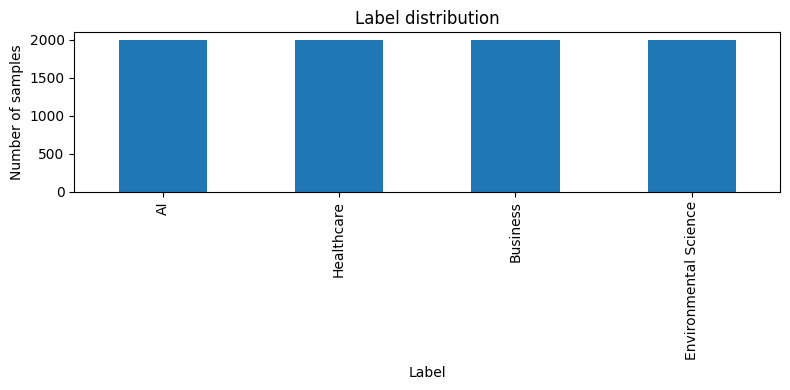

In [ ]:
# Plot 1: Label distribution (bar)
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("/content/arxiv_combined_8000.csv")
label_col = "field" if "field" in df.columns else "label" if "label" in df.columns else None
if label_col is None:
    raise SystemExit("No label/field column found in dataframe")

counts = df[label_col].value_counts().sort_values(ascending=False)

plt.figure(figsize=(8,4))
counts.plot.bar()
plt.title("Label distribution")
plt.ylabel("Number of samples")
plt.xlabel("Label")
plt.tight_layout()
plt.savefig("label_distribution.png", dpi=150)
plt.show()

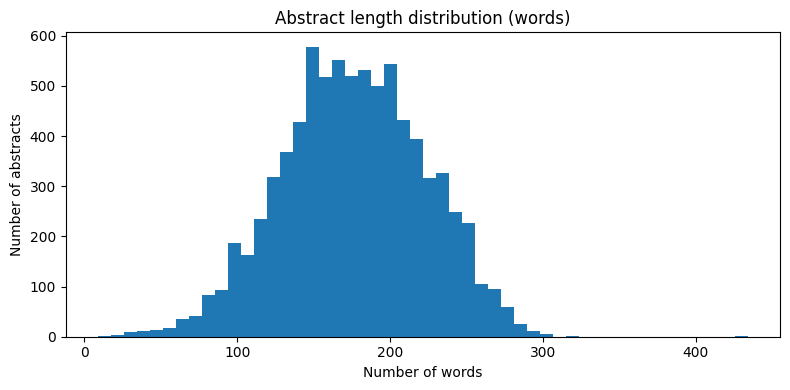

min, median, mean, 75pct, max: 9 176 176.0 209 434


In [ ]:
# Plot 2: Abstract length histogram
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv("/content/arxiv_combined_8000.csv")
texts = df["abstract"].fillna("").astype(str)
lengths = texts.str.split().map(len).values  # token count (whitespace)

plt.figure(figsize=(8,4))
plt.hist(lengths, bins=50)
plt.title("Abstract length distribution (words)")
plt.xlabel("Number of words")
plt.ylabel("Number of abstracts")
plt.tight_layout()
plt.savefig("abstract_length_hist.png", dpi=150)
plt.show()

# Print quick stats
print("min, median, mean, 75pct, max:", int(lengths.min()), int(np.median(lengths)), round(lengths.mean(),1), int(np.percentile(lengths,75)), int(lengths.max()))

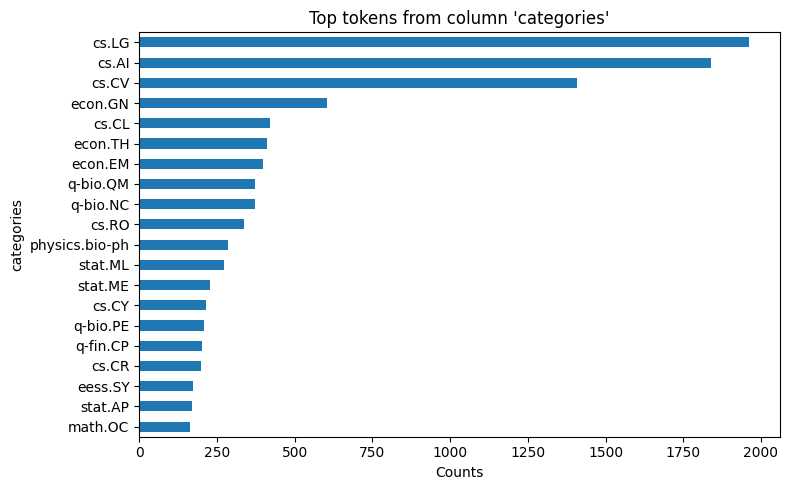

In [ ]:
# Plot 3: Top category tokens (explode comma-separated categories)
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("/content/arxiv_combined_8000.csv")
cat_col = None
for c in ["categories","category","terms","subjects"]:
    if c in df.columns:
        cat_col = c
        break

if cat_col:
    toks = df[cat_col].dropna().astype(str).str.split(",").explode().str.strip()
    top = toks.value_counts().head(20).sort_values(ascending=True)
    plt.figure(figsize=(8,5))
    top.plot.barh()
    plt.title(f"Top tokens from column '{cat_col}'")
    plt.xlabel("Counts")
    plt.tight_layout()
    plt.savefig("top_category_tokens.png", dpi=150)
    plt.show()
else:
    print("No categories-like column found (categories, category, terms, subjects).")

In [ ]:

import pandas as pd, numpy as np, os

FN = "/content/arxiv_combined_8000.csv"   # adjust if needed
df = pd.read_csv(FN)
print("Rows, cols:", df.shape)
# unify common columns
text_col = "abstract" if "abstract" in df.columns else "text" if "text" in df.columns else None
label_col = "field" if "field" in df.columns else "label" if "label" in df.columns else None
print("Text column:", text_col, "Label column:", label_col)

# create numeric features
df["abstract_text"] = df[text_col].fillna("").astype(str)
df["abstract_chars"] = df["abstract_text"].str.len()
df["abstract_words"] = df["abstract_text"].str.split().map(len)
df["title_text"] = df["title"].fillna("").astype(str) if "title" in df.columns else ""
df["title_chars"] = df["title_text"].str.len()
df["title_words"] = df["title_text"].str.split().map(len)

# quick view
df.head(3)

Rows, cols: (8000, 5)
Text column: abstract Label column: field


,id,title,abstract,categories,field,abstract_text,abstract_chars,abstract_words,title_text,title_chars,title_words
0,http://arxiv.org/abs/2511.21692v1,Revisiting Generalization Across Difficulty Le...,We investigate how well large language models ...,"cs.CL,cs.AI",AI,We investigate how well large language models ...,1232,180,Revisiting Generalization Across Difficulty Le...,68,9
1,http://arxiv.org/abs/2511.21691v1,Canvas-to-Image: Compositional Image Generatio...,While modern diffusion models excel at generat...,cs.CV,AI,While modern diffusion models excel at generat...,1440,176,Canvas-to-Image: Compositional Image Generatio...,72,7
2,http://arxiv.org/abs/2511.21690v1,TraceGen: World Modeling in 3D Trace Space Ena...,Learning new robot tasks on new platforms and ...,"cs.RO,cs.CV,cs.LG",AI,Learning new robot tasks on new platforms and ...,1496,210,TraceGen: World Modeling in 3D Trace Space Ena...,88,12


In [ ]:
# Cell B — descriptive stats
pd.set_option("display.max_rows", 200)
print("Numeric summary (abstract lengths etc):\n", df[["abstract_chars","abstract_words","title_chars","title_words"]].describe().T)
print("\nMissing values per column:\n", df.isna().sum())
if label_col:
    print("\nLabel distribution (top 20):\n", df[label_col].value_counts().head(20))
print("\nUnique counts (columns):")
print(df.nunique())

Numeric summary (abstract lengths etc):
                  count         mean         std   min     25%     50%     75%  \
abstract_chars  8000.0  1304.504125  346.928553  60.0  1068.0  1313.0  1564.0   
abstract_words  8000.0   176.024625   46.683053   9.0   144.0   176.0   209.0   
title_chars     8000.0    83.278125   26.019909   8.0    66.0    82.0    99.0   
title_words     8000.0    10.410875    3.463280   1.0     8.0    10.0    12.0   

                   max  
abstract_chars  2954.0  
abstract_words   434.0  
title_chars      207.0  
title_words       32.0  

Missing values per column:
 id                0
title             0
abstract          0
categories        0
field             0
abstract_text     0
abstract_chars    0
abstract_words    0
title_text        0
title_chars       0
title_words       0
dtype: int64

Label distribution (top 20):
 field
AI                       2000
Healthcare               2000
Business                 2000
Environmental Science    2000
Name: cou

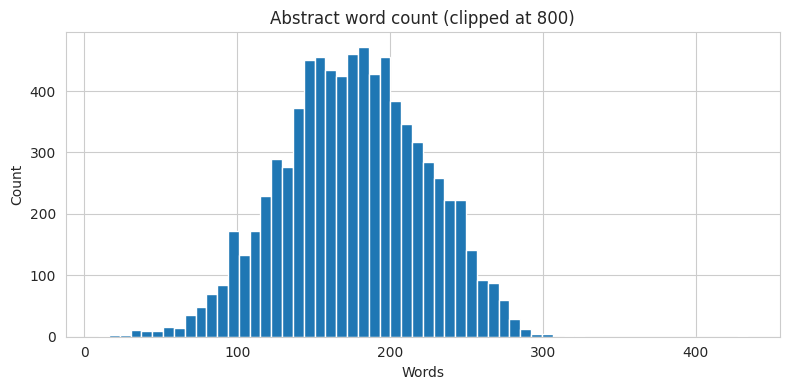

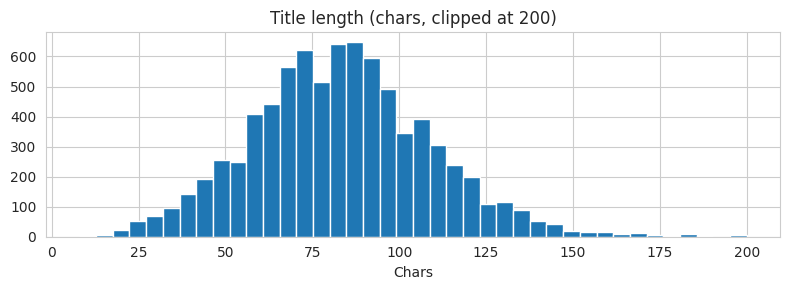

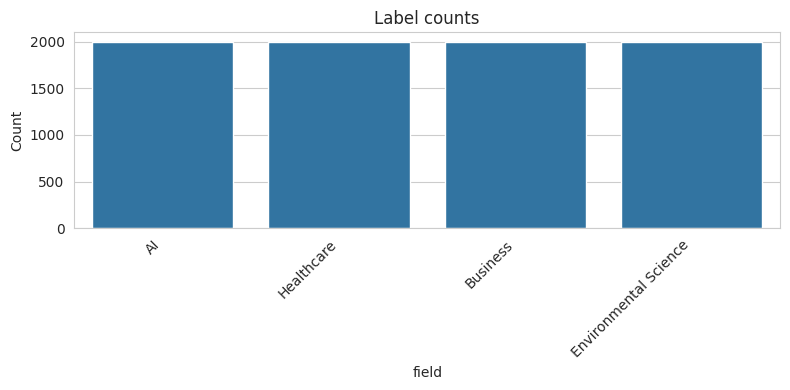

In [ ]:
# Cell C — univariate visuals: histograms and counts
import matplotlib.pyplot as plt, seaborn as sns
sns.set_style("whitegrid")

# 1. abstract word count histogram
plt.figure(figsize=(8,4))
plt.hist(df["abstract_words"].clip(upper=800), bins=60)
plt.title("Abstract word count (clipped at 800)")
plt.xlabel("Words")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("univariate_abstract_words_hist.png", dpi=150)
plt.show()

# 2. title length (chars) histogram
plt.figure(figsize=(8,3))
plt.hist(df["title_chars"].clip(upper=200), bins=40)
plt.title("Title length (chars, clipped at 200)")
plt.xlabel("Chars")
plt.tight_layout()
plt.savefig("univariate_title_chars_hist.png", dpi=150)
plt.show()

# 3. label count bar
if label_col:
    plt.figure(figsize=(8,4))
    vc = df[label_col].value_counts().sort_values(ascending=False)
    sns.barplot(x=vc.index, y=vc.values)
    plt.xticks(rotation=45, ha="right")
    plt.title("Label counts")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.savefig("univariate_label_counts.png", dpi=150)
    plt.show()

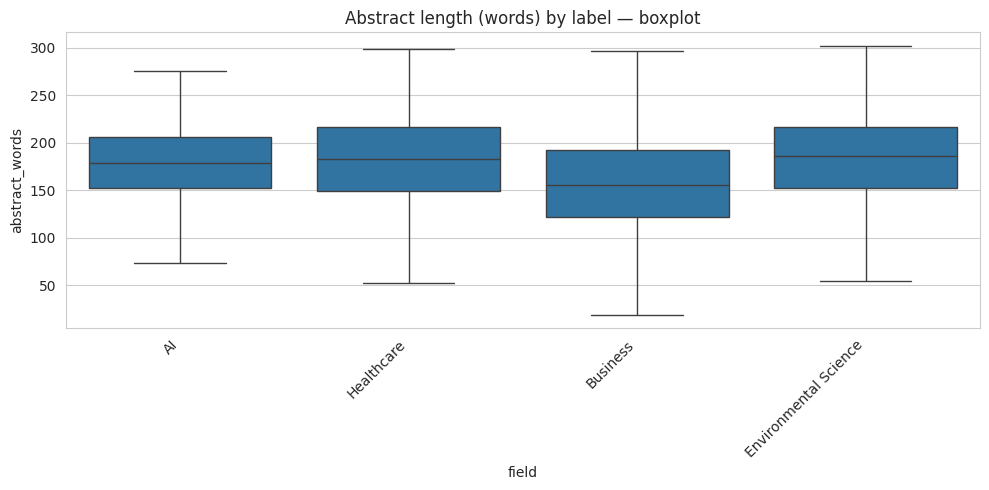

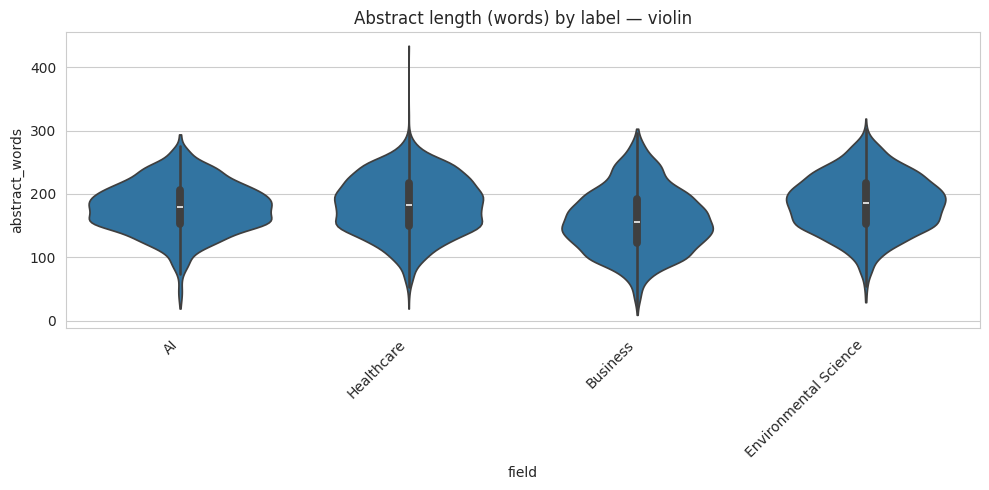

In [ ]:
# Cell D — bivariate: boxplot/violin of numeric vs labels
import matplotlib.pyplot as plt, seaborn as sns
sns.set_style("whitegrid")

num_col = "abstract_words"
if label_col and num_col in df.columns:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=label_col, y=num_col, data=df, showfliers=False)
    plt.xticks(rotation=45, ha="right")
    plt.title("Abstract length (words) by label — boxplot")
    plt.tight_layout()
    plt.savefig("bivariate_box_abstract_words_by_label.png", dpi=150)
    plt.show()

    plt.figure(figsize=(10,5))
    sns.violinplot(x=label_col, y=num_col, data=df, cut=0)
    plt.xticks(rotation=45, ha="right")
    plt.title("Abstract length (words) by label — violin")
    plt.tight_layout()
    plt.savefig("bivariate_violin_abstract_words_by_label.png", dpi=150)
    plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import os

# Load dataset
df = pd.read_csv("/content/arxiv_combined_8000.csv")

# Keep only abstract + field columns
df = df[["abstract", "field"]].rename(columns={
    "abstract": "text",
    "field": "label"
})

# Drop missing rows
df = df.dropna().reset_index(drop=True)

# Stratified split (80% train, 10% val, 10% test)
train, rest = train_test_split(
    df,
    test_size=0.2,
    random_state=42,
    stratify=df["label"]
)

val, test = train_test_split(
    rest,
    test_size=0.5,
    random_state=42,
    stratify=rest["label"]
)

# Save processed splits
os.makedirs("data/processed", exist_ok=True)
train.to_csv("data/processed/train.csv", index=False)
val.to_csv("data/processed/val.csv", index=False)
test.to_csv("data/processed/test.csv", index=False)

print("Train size:", len(train))
print("Validation size:", len(val))
print("Test size:", len(test))
print("\nTrain label distribution:")
print(train["label"].value_counts())

Train size: 6400
Validation size: 800
Test size: 800

Train label distribution:
label
Environmental Science    1600
Business                 1600
Healthcare               1600
AI                       1600
Name: count, dtype: int64


In [ ]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 5.1 MB/s eta 0:00:00


In [ ]:
# Cell A — tokenization, model, metrics, compute class weights, save label_map
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import numpy as np, json, os, torch
from sklearn.utils.class_weight import compute_class_weight
import evaluate

OUTDIR = "models/abstract_classifier"
TRAIN_CSV = "data/processed/train.csv"
VAL_CSV   = "data/processed/val.csv"

# load dataset
ds = load_dataset("csv", data_files={"train": TRAIN_CSV, "validation": VAL_CSV})
print("Loaded dataset splits:", ds)

# build label maps from union of splits to be safe
all_labels = set(ds["train"]["label"]) | set(ds["validation"]["label"])
labels = sorted(list(all_labels))
label2id = {l: i for i, l in enumerate(labels)}
id2label = {i: l for l, i in label2id.items()}
print("Labels (final):", labels)

# map string -> int (store as 'labels' which Trainer expects)
def map_label(example):
    lbl = example["label"]
    example["labels"] = label2id[lbl]
    return example

ds = ds.map(map_label)

# tokenizer + tokenize (keep only 'labels' and tokenizer outputs)
MODEL_NAME = "distilbert-base-uncased"
MAX_LENGTH = 128
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME, use_fast=True)

def tokenize_fn(batch):
    return tokenizer(batch["text"], padding="max_length", truncation=True, max_length=MAX_LENGTH)

print("Tokenizing dataset...")
tokenized = ds.map(tokenize_fn, batched=True, remove_columns=["text","label"])
print("Tokenized keys:", tokenized)

# model
model = AutoModelForSequenceClassification.from_pretrained(
    MODEL_NAME,
    num_labels=len(labels),
    id2label=id2label,
    label2id=label2id
)

# class weights (balanced)
train_labels = np.array(ds["train"]["labels"])
classes = np.unique(train_labels)
class_weights = compute_class_weight("balanced", classes=classes, y=train_labels)
class_weights = torch.tensor(class_weights, dtype=torch.float)
print("class weights:", class_weights)

# metrics
accuracy = evaluate.load("accuracy")
f1 = evaluate.load("f1")
def compute_metrics(eval_pred):
    logits, labels_eval = eval_pred
    preds = np.argmax(logits, axis=-1)
    return {
        "accuracy": accuracy.compute(predictions=preds, references=labels_eval)["accuracy"],
        "f1_macro": f1.compute(predictions=preds, references=labels_eval, average="macro")["f1"]
    }

# save label map for inference
os.makedirs(OUTDIR, exist_ok=True)
with open(os.path.join(OUTDIR, "label_map.json"), "w", encoding="utf-8") as f:
    json.dump(label2id, f, indent=2)
print("Saved label_map.json to", OUTDIR)

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Loaded dataset splits: DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 6400
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 800
    })
})
Labels (final): ['AI', 'Business', 'Environmental Science', 'Healthcare']


Map:   0%|          | 0/6400 [00:00<?, ? examples/s]

Map:   0%|          | 0/800 [00:00<?, ? examples/s]

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Tokenizing dataset...


Map:   0%|          | 0/6400 [00:00<?, ? examples/s]

Map:   0%|          | 0/800 [00:00<?, ? examples/s]

Tokenized keys: DatasetDict({
    train: Dataset({
        features: ['labels', 'input_ids', 'attention_mask'],
        num_rows: 6400
    })
    validation: Dataset({
        features: ['labels', 'input_ids', 'attention_mask'],
        num_rows: 800
    })
})


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


class weights: tensor([1., 1., 1., 1.])


Saved label_map.json to models/abstract_classifier


In [ ]:
# Cell B — TrainingArguments construction (works across transformers versions)
import transformers
from transformers import TrainingArguments
import torch

OUTDIR = OUTDIR if 'OUTDIR' in globals() else "models/abstract_classifier"

base_args = dict(
    output_dir=OUTDIR,
    per_device_train_batch_size=16 if torch.cuda.is_available() else 8,
    per_device_eval_batch_size=32,
    num_train_epochs=3,
    learning_rate=2e-5,
    weight_decay=0.01,
    logging_steps=50,
    save_total_limit=3,
    load_best_model_at_end=True,
    metric_for_best_model="f1_macro",
    dataloader_num_workers=2,
    dataloader_pin_memory=False,
    report_to="none",
)

modern = base_args.copy()
modern.update({"evaluation_strategy": "epoch", "save_strategy": "epoch"})

try:
    training_args = TrainingArguments(**modern)
except TypeError:
    fallback = base_args.copy()
    fallback.update({"eval_strategy": "epoch", "save_strategy": "epoch"})
    training_args = TrainingArguments(**fallback)

print("TrainingArguments OK. Transformers version:", transformers.__version__)
print(training_args)

# OPTIONAL: quick debug subset to iterate fast — uncomment to use
# tokenized["train"] = tokenized["train"].select(range(min(2000, len(tokenized["train"]))))
# tokenized["validation"] = tokenized["validation"].select(range(min(500, len(tokenized["validation"]))))

TrainingArguments OK. Transformers version: 4.57.2
TrainingArguments(
_n_gpu=1,
accelerator_config={'split_batches': False, 'dispatch_batches': None, 'even_batches': True, 'use_seedable_sampler': True, 'non_blocking': False, 'gradient_accumulation_kwargs': None, 'use_configured_state': False},
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
average_tokens_across_devices=True,
batch_eval_metrics=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=2,
dataloader_persistent_workers=False,
dataloader_pin_memory=False,
dataloader_prefetch_factor=None,
ddp_backend=None,
ddp_broadcast_buffers=None,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
do_eval=True,
do_predict=False,
do_train=False,
eval_accumulation_steps=None,
eval_delay=0,
eval_do_concat_batches=True,
eval_on_start=False,
eval_steps=None,
eval_strategy=I

In [ ]:
# Cell C — WeightedTrainer with robust compute_loss signature
from transformers import Trainer, DataCollatorWithPadding
import torch

data_collator = DataCollatorWithPadding(tokenizer)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
class_weights = class_weights.to(device)

def custom_loss(model, inputs, return_outputs=False):
    # inputs: dict of tensors from DataCollator
    # Move tensors to device (except labels will be moved too)
    inputs = {k: (v.to(device) if hasattr(v, "to") else v) for k, v in inputs.items()}
    labels = inputs.pop("labels")  # remove labels from inputs to avoid passing them twice
    outputs = model(**inputs)      # forward pass with input_ids, attention_mask, etc.
    logits = outputs.logits
    loss_fct = torch.nn.CrossEntropyLoss(weight=class_weights)
    loss = loss_fct(logits, labels.to(device))
    return (loss, outputs) if return_outputs else loss

class WeightedTrainer(Trainer):
    # accept any extra kwargs (some TF versions pass extra args)
    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        return custom_loss(model, inputs, return_outputs=return_outputs)

trainer = WeightedTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized["train"],
    eval_dataset=tokenized["validation"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

print("Trainer ready. Device:", device)

Trainer ready. Device: cuda


/tmp/ipython-input-1825598310.py:25: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `WeightedTrainer.__init__`. Use `processing_class` instead.
  trainer = WeightedTrainer(


In [ ]:
# Cell D — train, save, evaluate, test report
import time, os, json, numpy as np
from sklearn.metrics import classification_report, confusion_matrix

OUTDIR = OUTDIR if 'OUTDIR' in globals() else "models/abstract_classifier"
os.makedirs(OUTDIR, exist_ok=True)

print("Starting training...")
t0 = time.time()
train_result = trainer.train()
t1 = time.time()
print("Training finished in", round(t1 - t0, 1), "s")
print("Train result (train loss):", getattr(train_result, "training_loss", train_result))

# save model & tokenizer & label_map (label_map already saved)
print("Saving model to", OUTDIR)
trainer.save_model(OUTDIR)
tokenizer.save_pretrained(OUTDIR)
print("Saved model & tokenizer.")

# evaluate on validation
print("Validation metrics:")
val_metrics = trainer.evaluate(eval_dataset=tokenized["validation"])
print(val_metrics)

# test split if exists in tokenized (run predictions & classification report)
if "test" in tokenized:
    print("Predicting on test split...")
    preds_out = trainer.predict(tokenized["test"])
    logits, labels_test, _ = preds_out
    preds = np.argmax(logits, axis=-1)

    # try to load label_map
    label_map_path = os.path.join(OUTDIR, "label_map.json")
    if os.path.exists(label_map_path):
        label2id = json.load(open(label_map_path, "r", encoding="utf-8"))
        id2label = {int(v): k for k, v in label2id.items()}
    else:
        id2label = {int(k): v for k, v in model.config.id2label.items()} if hasattr(model.config, "id2label") else {}

    y_true = [id2label[int(x)] for x in labels_test]
    y_pred = [id2label[int(x)] for x in preds]

    print(classification_report(y_true, y_pred, digits=4))
    cm = confusion_matrix(y_true, y_pred, labels=sorted(list(set(y_true))))
    np.savetxt(os.path.join(OUTDIR, "confusion_matrix.csv"), cm, fmt="%d", delimiter=",")
    with open(os.path.join(OUTDIR, "test_report.json"), "w", encoding="utf-8") as f:
        json.dump(classification_report(y_true, y_pred, digits=4, output_dict=True), f, indent=2)

    print("Saved confusion matrix and report to", OUTDIR)
else:
    print("No test split available.")

Starting training...


Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro
1,0.637800,0.600420,0.776250,0.771322
2,0.499500,0.579766,0.782500,0.777432
3,0.437800,0.584562,0.786250,0.782972


Training finished in 238.2 s
Train result (train loss): 0.5795997190475464
Saving model to models/abstract_classifier
Saved model & tokenizer.
Validation metrics:


{'eval_loss': 0.584562361240387, 'eval_accuracy': 0.78625, 'eval_f1_macro': 0.7829723656452104, 'eval_runtime': 2.782, 'eval_samples_per_second': 287.563, 'eval_steps_per_second': 8.986, 'epoch': 3.0}
No test split available.


In [ ]:
# ====== Improved training cell: stronger settings, oversampling, fp16, early stopping ======
# Run this AFTER your tokenization cell that created: tokenized, tokenizer, labels, label2id, id2label, model
import os, math, time
import numpy as np
import torch
from datasets import Dataset, concatenate_datasets
from transformers import (
    Trainer, TrainingArguments, DataCollatorWithPadding,
    EarlyStoppingCallback, get_scheduler
)
from sklearn.utils.class_weight import compute_class_weight
from transformers import AutoModelForSequenceClassification

# ---------- Config (tweak these) ----------
BASE_MODEL = "distilbert-base-uncased"   # change to "roberta-base" for better performance (slower)
MAX_LENGTH = 256                         # larger context helps abstracts
OUTDIR = "models/abstract_classifier_better"
NUM_EPOCHS = 5
PER_DEVICE_BATCH = 16 if torch.cuda.is_available() else 8
GRAD_ACCUM = 1                           # set 2 or 4 if you need effectively larger batch on limited GPU
LR = 2e-5
WARMUP_RATIO = 0.06
FP16 = torch.cuda.is_available()         # enable mixed precision on GPU
SEED = 42
os.makedirs(OUTDIR, exist_ok=True)

# ---------- 1) Optional: replace model with a larger backbone (if you want) ----------
# If you'd like to try a larger encoder uncomment and run this (may increase accuracy but use more VRAM):
# model = AutoModelForSequenceClassification.from_pretrained(BASE_MODEL, num_labels=len(labels), id2label=id2label, label2id=label2id)

# ---------- 2) Oversample minority classes to balance dataset ----------
# Convert tokenized train to pandas-like lists (we use HuggingFace Dataset operations)
train_ds = tokenized["train"]
val_ds = tokenized["validation"]

# compute label counts
import collections
label_counts = collections.Counter(train_ds["labels"])
max_count = max(label_counts.values())
print("Label counts before oversample:", label_counts)
print("Target per-class count:", max_count)

# Create list of indices to reach balanced dataset by simple replication
indices = []
for label, count in label_counts.items():
    # indices of examples with this label
    ids = [i for i, v in enumerate(train_ds["labels"]) if v == label]
    if not ids:
        continue
    # replicate
    times = max_count // count
    rem = max_count % count
    expanded = ids * times + (ids[:rem] if rem>0 else [])
    indices.extend(expanded)

# shuffle indices
import random
random.seed(SEED)
random.shuffle(indices)

# new balanced train dataset
balanced_train = train_ds.select(indices)
print("Balanced train size:", len(balanced_train), "val size:", len(val_ds))

# ---------- 3) Data collator ----------
data_collator = DataCollatorWithPadding(tokenizer)

# ---------- 4) class weights retained (optional) ----------
train_labels = np.array(balanced_train["labels"])
classes = np.unique(train_labels)
class_weights = compute_class_weight("balanced", classes=classes, y=train_labels)
class_weights = torch.tensor(class_weights, dtype=torch.float).to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))
print("Class weights:", class_weights)

# ---------- 5) Robust TrainingArguments construction (compat with multiple transformers versions) ----------
base_args = dict(
    output_dir=OUTDIR,
    per_device_train_batch_size=PER_DEVICE_BATCH,
    per_device_eval_batch_size=PER_DEVICE_BATCH if PER_DEVICE_BATCH<=32 else 32,
    num_train_epochs=NUM_EPOCHS,
    learning_rate=LR,
    weight_decay=0.01,
    logging_steps=200,
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="f1_macro",
    seed=SEED,
    fp16=FP16,
    gradient_accumulation_steps=GRAD_ACCUM,
    report_to="none",                    # disable wandb / logging integrations
)

modern = base_args.copy()
modern.update({"evaluation_strategy": "epoch", "save_strategy": "epoch", "save_steps": None})

try:
    training_args = TrainingArguments(**modern)
except TypeError:
    # older transformers name fallbacks
    fallback = base_args.copy()
    fallback.update({"eval_strategy": "epoch", "save_strategy": "epoch"})
    training_args = TrainingArguments(**fallback)

print("TrainingArguments ready. Using fp16:", FP16)

# ---------- 6) Weighted trainer: define compute_loss that accepts extra kwargs -----------
from transformers import Trainer

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
class_weights = class_weights.to(device)

def custom_loss(model, inputs, return_outputs=False):
    labels = inputs.get("labels")
    labels = labels.to(device)
    # move inputs except labels to device (avoid moving numpy types)
    inputs_device = {k: v.to(device) for k, v in inputs.items() if k != "labels"}
    outputs = model(**inputs_device)
    logits = outputs.logits
    loss_fct = torch.nn.CrossEntropyLoss(weight=class_weights)
    loss = loss_fct(logits, labels)
    return (loss, outputs) if return_outputs else loss

class WeightedTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        return custom_loss(model, inputs, return_outputs=return_outputs)

# ---------- 7) compute_metrics function (same as before) ----------
import evaluate
accuracy = evaluate.load("accuracy")
f1 = evaluate.load("f1")
def compute_metrics(eval_pred):
    logits, labels_eval = eval_pred
    preds = np.argmax(logits, axis=-1)
    acc = accuracy.compute(predictions=preds, references=labels_eval)["accuracy"]
    f1m = f1.compute(predictions=preds, references=labels_eval, average="macro")["f1"]
    return {"accuracy": acc, "f1_macro": f1m}

# ---------- 8) Trainer and callbacks (early stopping) ----------
trainer = WeightedTrainer(
    model=model,
    args=training_args,
    train_dataset=balanced_train,
    eval_dataset=val_ds,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

# Early stopping: patience = 2 validation epochs
callbacks = [EarlyStoppingCallback(early_stopping_patience=2)]
trainer.add_callback(EarlyStoppingCallback(early_stopping_patience=2))

# ---------- 9) Train ----------
t0 = time.time()
train_result = trainer.train()
t1 = time.time()
print("Training finished in", round(t1-t0,1), "s")
print("Train result summary:", train_result)

# ---------- 10) Save final artifacts ----------
trainer.save_model(OUTDIR)
tokenizer.save_pretrained(OUTDIR)
# also save label_map if not saved
import json
label_map = {k: int(v) for k, v in label2id.items()}
with open(os.path.join(OUTDIR, "label_map.json"), "w", encoding="utf-8") as f:
    json.dump(label_map, f, indent=2)
print("Saved model, tokenizer and label_map to", OUTDIR)

# ---------- 11) Quick eval on validation ----------
eval_metrics = trainer.evaluate(eval_dataset=val_ds)
print("Validation metrics:", eval_metrics)

Label counts before oversample: Counter({2: 1600, 1: 1600, 3: 1600, 0: 1600})
Target per-class count: 1600
Balanced train size: 6400 val size: 800
Class weights: tensor([1., 1., 1., 1.], device='cuda:0')
TrainingArguments ready. Using fp16: True


/tmp/ipython-input-3605140716.py:139: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `WeightedTrainer.__init__`. Use `processing_class` instead.
  trainer = WeightedTrainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro
1,0.473900,0.611343,0.786250,0.782403
2,0.400900,0.641193,0.773750,0.771838
3,0.321200,0.732410,0.753750,0.751487


Training finished in 111.3 s
Train result summary: TrainOutput(global_step=1200, training_loss=0.389555778503418, metrics={'train_runtime': 110.3585, 'train_samples_per_second': 289.964, 'train_steps_per_second': 18.123, 'total_flos': 635866192281600.0, 'train_loss': 0.389555778503418, 'epoch': 3.0})
Saved model, tokenizer and label_map to models/abstract_classifier_better


Validation metrics: {'eval_loss': 0.6113426685333252, 'eval_accuracy': 0.78625, 'eval_f1_macro': 0.7824030524687184, 'eval_runtime': 0.9097, 'eval_samples_per_second': 879.417, 'eval_steps_per_second': 54.964, 'epoch': 3.0}


In [ ]:
# ===== Try a stronger backbone (roberta-base) + longer training =====
import os, time, random, numpy as np, torch
from transformers import AutoModelForSequenceClassification, TrainingArguments, EarlyStoppingCallback
from sklearn.utils.class_weight import compute_class_weight

# Config - tweak if OOM
BASE_MODEL = "roberta-base"        # stronger encoder; try roberta-base
MAX_LENGTH = 256                   # more context for abstracts
OUTDIR = "models/abstract_classifier_roberta"
NUM_EPOCHS = 6
PER_DEVICE_BATCH = 8               # per device; gradient_accum will simulate larger effective bs
GRAD_ACCUM = 2                     # effective batch = PER_DEVICE_BATCH * GRAD_ACCUM * devices
LR = 3e-5
WARMUP_RATIO = 0.06
SEED = 42
os.makedirs(OUTDIR, exist_ok=True)

print("CUDA available:", torch.cuda.is_available())
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 1) re-create tokenizer/model with roberta (keep tokenization already done; only need model)
model = AutoModelForSequenceClassification.from_pretrained(
    BASE_MODEL,
    num_labels=len(label2id),
    id2label={int(k): v for k, v in id2label.items()} if isinstance(id2label, dict) else id2label,
    label2id=label2id
)
model.to(device)

# 2) recompute class weights over the balanced_train (if you kept the balanced selection)
train_labels = np.array(balanced_train["labels"])
classes = np.unique(train_labels)
class_weights = compute_class_weight("balanced", classes=classes, y=train_labels)
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)
print("class weights:", class_weights)

# 3) TrainingArguments (robust for older/newer transformers; disable wandb)
base = dict(
    output_dir=OUTDIR,
    per_device_train_batch_size=PER_DEVICE_BATCH,
    per_device_eval_batch_size=PER_DEVICE_BATCH,
    num_train_epochs=NUM_EPOCHS,
    learning_rate=LR,
    weight_decay=0.01,
    logging_steps=200,
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="f1_macro",
    seed=SEED,
    fp16=torch.cuda.is_available(),
    gradient_accumulation_steps=GRAD_ACCUM,
    report_to="none",   # avoid wandb issues
)
modern = base.copy()
modern.update({"evaluation_strategy": "epoch", "save_strategy": "epoch"})
try:
    training_args = TrainingArguments(**modern)
except TypeError:
    fallback = base.copy()
    fallback.update({"eval_strategy": "epoch", "save_strategy": "epoch"})
    training_args = TrainingArguments(**fallback)

print("TrainingArguments prepared. fp16:", training_args.fp16)

# 4) custom weighted trainer preserving compatibility
from transformers import Trainer, DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer)

def custom_loss(model_, inputs, return_outputs=False):
    labels = inputs.get("labels")
    labels = labels.to(device)
    # move inputs (except labels) to device
    inputs_device = {k: v.to(device) for k, v in inputs.items() if k != "labels"}
    outputs = model_(**inputs_device)
    logits = outputs.logits
    loss_fct = torch.nn.CrossEntropyLoss(weight=class_weights)
    loss = loss_fct(logits, labels)
    return (loss, outputs) if return_outputs else loss

class WeightedTrainer(Trainer):
    def compute_loss(self, model_, inputs, return_outputs=False, **kwargs):
        return custom_loss(model_, inputs, return_outputs=return_outputs)

# 5) metrics (same as before)
import evaluate
accuracy = evaluate.load("accuracy")
f1 = evaluate.load("f1")
def compute_metrics(eval_pred):
    logits, labels_eval = eval_pred
    preds = np.argmax(logits, axis=-1)
    return {
        "accuracy": accuracy.compute(predictions=preds, references=labels_eval)["accuracy"],
        "f1_macro": f1.compute(predictions=preds, references=labels_eval, average="macro")["f1"],
    }

# 6) instantiate trainer and add early stopping
trainer = WeightedTrainer(
    model=model,
    args=training_args,
    train_dataset=balanced_train,
    eval_dataset=val_ds,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

trainer.add_callback(EarlyStoppingCallback(early_stopping_patience=2))

# 7) train
t0 = time.time()
train_result = trainer.train()
t1 = time.time()
print("Training finished in", round(t1 - t0, 1), "s")
print("Train result:", getattr(train_result, "training_loss", train_result))

# 8) save
trainer.save_model(OUTDIR)
tokenizer.save_pretrained(OUTDIR)
import json
with open(os.path.join(OUTDIR, "label_map.json"), "w", encoding="utf-8") as f:
    json.dump(label2id, f, indent=2)
print("Saved model to", OUTDIR)

# 9) evaluate
eval_metrics = trainer.evaluate(eval_dataset=val_ds)
print("Validation metrics:", eval_metrics)

CUDA available: True


config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


class weights: tensor([1., 1., 1., 1.], device='cuda:0')
TrainingArguments prepared. fp16: True


/tmp/ipython-input-144731526.py:97: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `WeightedTrainer.__init__`. Use `processing_class` instead.
  trainer = WeightedTrainer(
The tokenizer has new PAD/BOS/EOS tokens that differ from the model config and generation config. The model config and generation config were aligned accordingly, being updated with the tokenizer's values. Updated tokens: {'eos_token_id': None, 'bos_token_id': None, 'pad_token_id': 0}.


Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro
1,1.391500,1.386512,0.250000,0.100000
2,1.389800,1.386648,0.250000,0.100000
3,1.389200,1.387530,0.250000,0.100000


Training finished in 257.7 s
Train result: 1.3905757395426432
Saved model to models/abstract_classifier_roberta


Validation metrics: {'eval_loss': 1.3865118026733398, 'eval_accuracy': 0.25, 'eval_f1_macro': 0.1, 'eval_runtime': 1.7805, 'eval_samples_per_second': 449.307, 'eval_steps_per_second': 56.163, 'epoch': 3.0}


In [ ]:
# DIAGNOSTICS: run this and paste the output back here
import numpy as np, torch, json
from sklearn.metrics import classification_report, confusion_matrix
import math

def safe_print(x):
    print(x)

# 1) model info
try:
    print("model.config.num_labels:", model.config.num_labels)
    if hasattr(model.config, "id2label"):
        print("model.config.id2label (first 10):", dict(list(model.config.id2label.items())[:10]))
except Exception as e:
    print("model info error:", e)

# 2) label maps
try:
    print("\nlabel2id (sample):", dict(list(label2id.items())[:20]))
    print("id2label (sample):", dict(list(id2label.items())[:20]))
except Exception as e:
    print("label map error:", e)

# 3) dataset label ranges
def inspect_dataset(ds_name, ds):
    try:
        arr = np.array(ds["labels"]) if "labels" in ds.column_names else np.array(ds["label"])
        print(f"\n{ds_name} -> n = {len(arr)} dtype={arr.dtype} min={arr.min()} max={arr.max()} unique={np.unique(arr)[:30]}")
    except Exception as e:
        print(f"{ds_name} inspect error:", e)

# Try common dataset names
for name in ("train","validation","val","test"):
    if name in locals().get('tokenized', {}):
        inspect_dataset(name, tokenized[name])
    else:
        # try balanced_train / val_ds from your code
        if name == "train" and 'balanced_train' in globals():
            inspect_dataset("balanced_train", balanced_train)
        if (name in ("validation","val")) and 'val_ds' in globals():
            inspect_dataset("val_ds", val_ds)

# 4) ensure label ids < model.num_labels
try:
    all_labels = []
    if 'balanced_train' in globals():
        all_labels.extend(list(balanced_train["labels"]))
    if 'tokenized' in globals() and "validation" in tokenized:
        all_labels.extend(list(tokenized["validation"]["labels"]))
    if len(all_labels)>0:
        ml = model.config.num_labels
        print("\nmax label id found:", max(all_labels), "num_labels:", ml)
        if max(all_labels) >= ml:
            print(">>> PROBLEM: some label ids >= model.num_labels (labels out of range).")
        else:
            print("label ids are within range.")
except Exception as e:
    print("range check error:", e)

# 5) Quick sanity — run predictions on 20 validation examples and show mapping
try:
    # pick 20 examples from validation
    from random import sample
    if 'val_ds' in globals():
        small = val_ds.select(range(min(20, len(val_ds))))
    elif 'tokenized' in globals() and "validation" in tokenized:
        small = tokenized["validation"].select(range(min(20, len(tokenized["validation"]))))
    else:
        small = None

    if small is not None:
        texts = tokenizer.batch_decode(small["input_ids"][:5], skip_special_tokens=True)
        inputs = tokenizer(texts, truncation=True, padding=True, return_tensors="pt")
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        model.to(device)
        outputs = model(**{k: v.to(device) for k, v in inputs.items()})
        logits = outputs.logits.detach().cpu().numpy()
        preds = np.argmax(logits, axis=-1)
        print("\nSample preds (label ids):", preds)
        print("Sample logits shape:", logits.shape)
        # map ids -> label names if possible
        if isinstance(id2label, dict):
            print("Pred names:", [id2label.get(int(p), str(p)) for p in preds])
        else:
            print("No id2label available.")
    else:
        print("No small validation subset found to sanity-check predictions.")
except Exception as e:
    print("prediction sanity-check error:", e)

# 6) if trainer exists, produce confusion matrix on full validation (can be slow)
try:
    if 'trainer' in globals() and "validation" in tokenized:
        print("\nRunning trainer.predict on validation (fast) — may take a few seconds...")
        preds_out = trainer.predict(tokenized["validation"])
        logits, labels, _ = preds_out
        y_pred = np.argmax(logits, axis=-1)
        y_true = labels
        # label name mapping
        if isinstance(id2label, dict):
            y_true_names = [id2label.get(int(x), str(x)) for x in y_true]
            y_pred_names = [id2label.get(int(x), str(x)) for x in y_pred]
        else:
            y_true_names = y_true
            y_pred_names = y_pred
        print("\nClassification report (validation):")
        print(classification_report(y_true_names, y_pred_names, digits=4))
        print("\nConfusion matrix shape:", confusion_matrix(y_true_names, y_pred_names).shape)
    else:
        print("trainer or tokenized['validation'] not available for full predict.")
except Exception as e:
    print("trainer predict error:", e)

model.config.num_labels: 4
model.config.id2label (first 10): {0: 'AI', 1: 'Business', 2: 'Environmental Science', 3: 'Healthcare'}

label2id (sample): {'AI': 0, 'Business': 1, 'Environmental Science': 2, 'Healthcare': 3}
id2label (sample): {0: 'AI', 1: 'Business', 2: 'Environmental Science', 3: 'Healthcare'}

train -> n = 6400 dtype=int64 min=0 max=3 unique=[0 1 2 3]

validation -> n = 800 dtype=int64 min=0 max=3 unique=[0 1 2 3]

val_ds -> n = 800 dtype=int64 min=0 max=3 unique=[0 1 2 3]

max label id found: 3 num_labels: 4
label ids are within range.

Sample preds (label ids): [2 2 2 2 2]
Sample logits shape: (5, 4)
Pred names: ['Environmental Science', 'Environmental Science', 'Environmental Science', 'Environmental Science', 'Environmental Science']

Running trainer.predict on validation (fast) — may take a few seconds...



Classification report (validation):
                       precision    recall  f1-score   support

                   AI     0.0000    0.0000    0.0000       200
             Business     0.0000    0.0000    0.0000       200
Environmental Science     0.2500    1.0000    0.4000       200
           Healthcare     0.0000    0.0000    0.0000       200

             accuracy                         0.2500       800
            macro avg     0.0625    0.2500    0.1000       800
         weighted avg     0.0625    0.2500    0.1000       800


Confusion matrix shape: (4, 4)


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import os

print("Folders under /content/models:")
print(os.listdir("/content/models"))

# show files inside abstract_classifier
print("\nabstract_classifier files:")
print(os.listdir("/content/models/abstract_classifier_better"))

Folders under /content/models:
['abstract_classifier', 'abstract_classifier_roberta', 'abstract_classifier_better']

abstract_classifier files:
['tokenizer_config.json', 'training_args.bin', 'label_map.json', 'config.json', 'checkpoint-1200', 'model.safetensors', 'tokenizer.json', 'special_tokens_map.json', 'vocab.txt', 'checkpoint-400']


In [ ]:
!zip -r abstract_classifier.zip /content/models/abstract_classifier

  adding: content/models/abstract_classifier/ (stored 0%)
  adding: content/models/abstract_classifier/tokenizer_config.json (deflated 75%)
  adding: content/models/abstract_classifier/training_args.bin (deflated 53%)
  adding: content/models/abstract_classifier/label_map.json (deflated 14%)
  adding: content/models/abstract_classifier/checkpoint-800/ (stored 0%)
  adding: content/models/abstract_classifier/checkpoint-800/tokenizer_config.json (deflated 75%)
  adding: content/models/abstract_classifier/checkpoint-800/training_args.bin (deflated 53%)
  adding: content/models/abstract_classifier/checkpoint-800/scheduler.pt (deflated 61%)
  adding: content/models/abstract_classifier/checkpoint-800/trainer_state.json (deflated 74%)
  adding: content/models/abstract_classifier/checkpoint-800/config.json (deflated 48%)
  adding: content/models/abstract_classifier/checkpoint-800/model.safetensors (deflated 8%)
  adding: content/models/abstract_classifier/checkpoint-800/tokenizer.json (deflate

In [ ]:
from google.colab import files
files.download('/content/abstract_classifier.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>